<a href="https://www.kaggle.com/code/rohitgadhwar/linear-regression-from-scratch?scriptVersionId=109984835" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Linear Regression

<b>Linear Regression is a method used to define a relationship between a dependent variable (Y) and independent variable (X). Which is simply written as :</b>
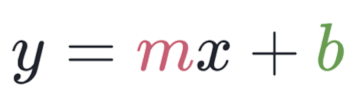

<br><b>Where y is the dependent variable, m is the scale factor or coefficient, b being the bias coefficient and X being the independent variable. The bias coefficient gives an extra degree of freedom to this model. The goal is to draw the line of best fit between X and Y which estimates the relationship between X and Y.</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Training data

In [2]:
w1 = 3
w0 = 4
n = 200

X = 10*np.random.rand(n,)

# obtain y = 4+3*x + noise
y = w0+w1*X + np.random.rand(n,)

In [3]:
print('Shape of feature matrix: ', X.shape)
print('Shape of label vector: ', y.shape)

Shape of feature matrix:  (200,)
Shape of label vector:  (200,)


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [5]:
print("shape of training feature matrix:", x_train.shape)
print("shape of training label vector:", y_train.shape)

print("shape of test feature matrix:", x_test.shape)
print("shape of test label vector:", y_test.shape)

shape of training feature matrix: (160,)
shape of training label vector: (160,)
shape of test feature matrix: (40,)
shape of test label vector: (40,)


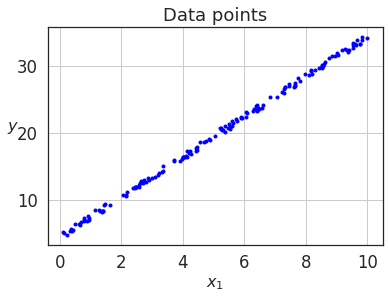

In [6]:
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2.5})

plt.plot(x_train, y_train, 'b.')
plt.title("Data points")
plt.grid(True)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)

plt.show()

In [7]:
def dummy_feature(X):
    return np.c_[np.ones((X.shape[0])), X]

In [8]:
x_train = dummy_feature(x_train)
x_test = dummy_feature(x_test)

In [9]:
x_train[:5]

array([[1.        , 4.86453618],
       [1.        , 8.2973057 ],
       [1.        , 7.45486769],
       [1.        , 8.95372202],
       [1.        , 1.45079596]])

### Loss Function
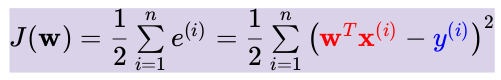

# **How to ﬁnd the model with the least loss or error?**
* <b>Normal Equation</b>
* <b>Gradient Descent</b>
    * Batch Gradient Descent
    * Mini Batch Gradient Descent
    * Stochastic Gradient Descent

# <b>Normal Equation</b>
**Set the partial derivative to 0 and solve with analytical method
to obtain the weight vector**
<br><br>
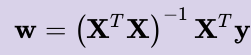

In [10]:
class LinearRegression(object):
    
    def __init__(self):
        self.w = None
    
    def predict(self, X):
        y = X@self.w
        return y
    
    def loss(self, X, y):
        e = y - self.predict(X)
        return (1/2)*(np.transpose(e)@e)
    
    def fit(self, X, y):
        self.w = np.linalg.pinv(X)@y
        return self.w

    def mse(self, X, y):
        return (2/X.shape[0])*self.loss(X, y)

In [11]:
lr = LinearRegression()
lr.fit(x_train, y_train)

array([4.39481686, 3.01075182])

In [12]:
print('training loss:', lr.mse(x_train, y_train))
print('validation loss:', lr.mse(x_test, y_test))

training loss: 0.0858253745872816
validation loss: 0.07174451140539662


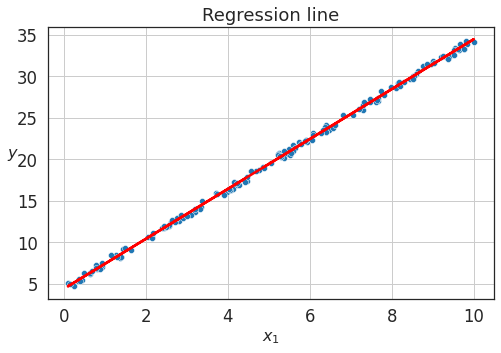

In [13]:
f = plt.figure(figsize=(8,5))

sns.scatterplot(x=x_train[:,1], y=y_train)
plt.plot(x_train[:,1], lr.predict(x_train), color='red')
plt.title("Regression line")
plt.grid(True)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)

plt.show()

# <b>Gradient Descent</b>

**Iteratively change the weights based on the partial derivative
of the loss function until convergence (Iterative optimization)**

### Calculate Gradient
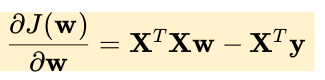
### Weight update
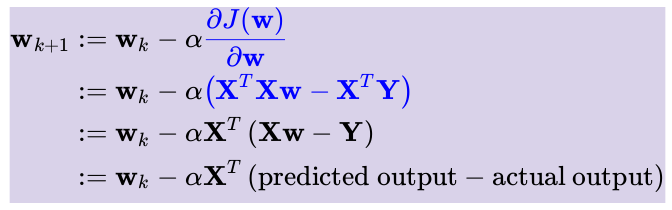 

## **1. Batch Gradient Descent**
This is a type of gradient descent which processes all the training examples for each iteration of gradient descent. But if the number of training examples is large, then batch gradient descent is computationally very expensive. Hence if the number of training examples is large, then batch gradient descent is not preferred. Instead, we prefer to use stochastic gradient descent or mini-batch gradient descent.

In [14]:
class BatchGradientDescent(object):
    
    def __init__(self):
        self.w = None
        self.w_all = []
        self.err_all = []
    
    def predict(self, X):
        y = X@self.w
        return y
    
    def loss(self, X, y):
        e = y - self.predict(X)
        return (1/2)*(np.transpose(e)@e)
    
    def gradient(self, X, y):
        return np.transpose(X)@(self.predict(X) - y)
    
    def update_weights(self, grad, lr):
        return (self.w - lr*grad)
    
    def fit(self, X, y, epochs=100, lr=0.001):
        self.w = np.zeros((X.shape[-1]))
        
        for _ in np.arange(0, epochs):
            grad = self.gradient(X, y)
            self.w = self.update_weights(grad, lr)
            
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y))
        return self.w
    
    def mse(self, X, y):
        return (2/X.shape[0])*self.loss(X, y)
    
    def plot_learning_curves(self):
        plt.plot(self.err_all)
        plt.xlabel('iteration #')
        plt.ylabel('Loss: $J(\mathbf{w})$')
        plt.title('Learning curve')

In [15]:
gd = BatchGradientDescent()
gd.fit(x_train, y_train, 1000, 0.0001)

array([4.30756483, 3.02382619])

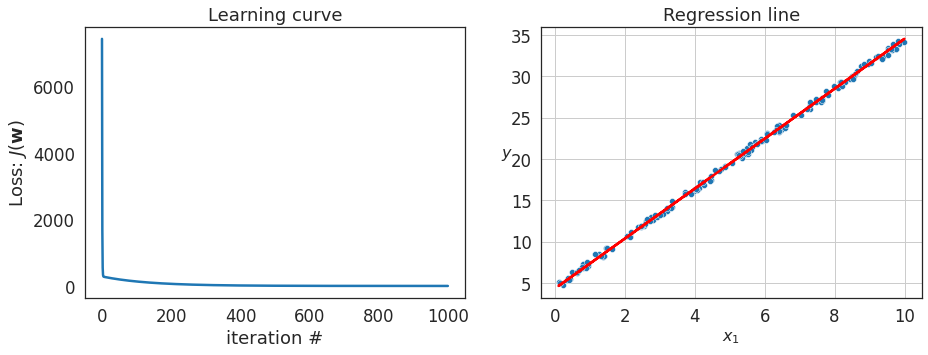

In [16]:
f = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
gd.plot_learning_curves()

plt.subplot(1,2,2)
sns.scatterplot(x=x_train[:,1], y=y_train)
plt.plot(x_train[:,1], gd.predict(x_train), color='red')
plt.title("Regression line")
plt.grid(True)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)

plt.show()

In [17]:
print('training loss:', gd.mse(x_train, y_train))
print('validation loss:', gd.mse(x_test, y_test))

training loss: 0.08766513343574733
validation loss: 0.07941973701460968


## **2. Mini batch gradient descent**
This is a type of gradient descent which works faster than both batch gradient descent and stochastic gradient descent. Here b examples where b<m are processed per iteration. So even if the number of training examples is large, it is processed in batches of b training examples in one go. Thus, it works for larger training examples and that too with lesser number of iterations.

In [18]:
class MiniBatchGradientDescent(object):
    
    def __init__(self):
        self.w = None
        self.w_all = []
        self.err_all = []
    
    def predict(self, X):
        y = X@self.w
        return y
    
    def loss(self, X, y):
        e = y - self.predict(X)
        return (1/2)*(np.transpose(e)@e)
    
    def gradient(self, X, y):
        return np.transpose(X)@(self.predict(X) - y)
    
    def update_weights(self, lr, grad):
        return (self.w - lr*grad)
    
    def fit(self, X, y, epochs=100, lr=0.001, batch_size=10):
        self.w = np.zeros((X.shape[1]))
        
        for _ in range(0, epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]
            
            for i in range(0, X.shape[0], batch_size):
                xi = X_shuffled[i:i+batch_size]
                yi = y_shuffled[i:i+batch_size]
                
                grad = (2/batch_size) * self.gradient(xi, yi)
                self.w = self.update_weights(lr, grad)
                
            self.w_all.append(self.w)
            self.err_all.append(self.loss(xi, yi))
    
    def mse(self, X, y):
        return (2/X.shape[0])*self.loss(X, y)
    
    def plot_learning_curves(self):
        plt.plot(self.err_all)
        plt.xlabel('iteration #')
        plt.ylabel('Loss: $J(\mathbf{w})$')
        plt.title('Learning curve')

In [19]:
mbgd = MiniBatchGradientDescent()
mbgd.fit(x_train, y_train, 1000, 0.01)

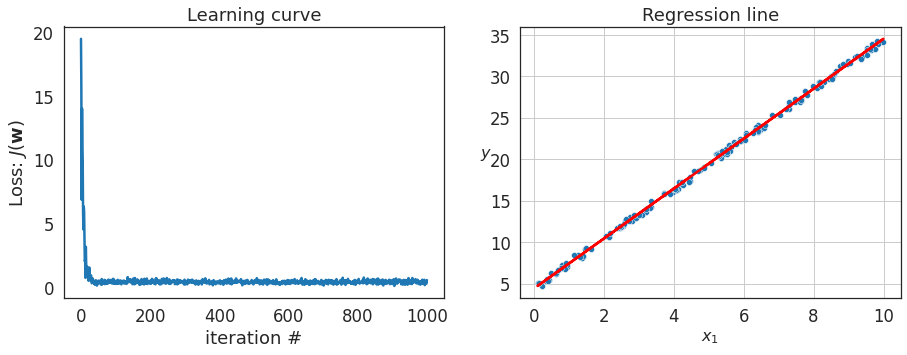

In [20]:
f = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
mbgd.plot_learning_curves()

plt.subplot(1,2,2)
sns.scatterplot(x=x_train[:,1], y=y_train)
plt.plot(x_train[:,1], mbgd.predict(x_train), color='red')
plt.title("Regression line")
plt.grid(True)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)

plt.show()

In [21]:
print('training loss:', mbgd.mse(x_train, y_train))
print('validation loss:', mbgd.mse(x_test, y_test))

training loss: 0.08601046666673579
validation loss: 0.07116831526723133


## **3. Stochastic Gradient Descent**
This is a type of gradient descent which processes 1 training example per iteration. Hence, the parameters are being updated even after one iteration in which only a single example has been processed. Hence this is quite faster than batch gradient descent. But again, when the number of training examples is large, even then it processes only one example which can be additional overhead for the system as the number of iterations will be quite large.

In [22]:
class StochasticGradientDescent(object):
    def __init__(self):
        self.w = None
        self.w_all = []
        self.err_all = []
    
    def predict(self, X):
        y = X@self.w
        return y
    
    def loss(self, X, y):
        e = y - self.predict(X)
        return (1/2)*(np.transpose(e)@e)
    
    def gradient(self, X, y):
        return np.transpose(X)@(self.predict(X) - y)
    
    def update_weights(self, grad, lr):
        return (self.w - lr*grad)
    
    def fit(self, X, y, epochs=100, lr=0.001):
        self.w = np.zeros((X.shape[1]))
        
        for _ in range(epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]
            
            for i in range(0, X.shape[0]):
                xi = X_shuffled[i:i+1]
                yi = y_shuffled[i:i+1]
                
                grad = 2*self.gradient(X, y)
                self.w = self.update_weights(grad, lr)
            
            self.w_all.append(self.w)
            self.err_all.append(self.loss(xi, yi))
    
    def mse(self, X, y):
        return (2/X.shape[0])*self.loss(X, y)
    
    def plot_learning_curves(self):
        plt.plot(self.err_all)
        plt.xlabel('iteration #')
        plt.ylabel('Loss: $J(\mathbf{w})$')
        plt.title('Learning curve')

In [23]:
sgd = StochasticGradientDescent()
sgd.fit(x_train, y_train, 1000, 0.0001)

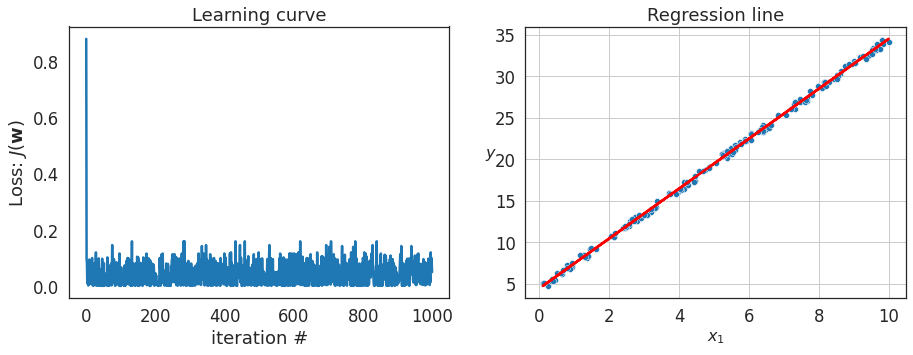

In [24]:
f = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sgd.plot_learning_curves()

plt.subplot(1,2,2)
sns.scatterplot(x=x_train[:,1], y=y_train)
plt.plot(x_train[:,1], sgd.predict(x_train), color='red')
plt.title("Regression line")
plt.grid(True)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)

plt.show()

In [25]:
print('training loss:', sgd.mse(x_train, y_train))
print('validation loss:', sgd.mse(x_test, y_test))

training loss: 0.08582537458728168
validation loss: 0.07174451140539913
